In [154]:
from numpy import *

import matplotlib
matplotlib.style.use('publication23')

import QuarkTM
import TMQGP as tm

qrange = linspace(0, 5.5, 251)
erange = linspace(-5.5, 5.5, 1001)

In [155]:
import os

In [156]:
os.getpid()

55536

# Fermions QP pressure

In [173]:
epss = [1e-2, 1e-3, 1e-4, 1e-5]

In [203]:
qs = [
    QuarkTM.Particle(0.6, qrange, erange, stat='b', eps=eps)
    for eps in epss
]

In [195]:
Trange = linspace(0.05, .7, 20)

In [176]:
pss = []

In [177]:
for q in qs:
    iImG = tm.Interpolator2D(qrange, erange, ascontiguousarray(imag(q.Gtab)))
    iReG = tm.Interpolator2D(qrange, erange, ascontiguousarray(real(q.Gtab)))
    ps = array([tm.OmQ_F(T, iImG, iReG) for T in Trange])
    pss += [ps]

In [178]:
from scipy.integrate import quad

In [179]:
Pfree = array([quad(lambda z: z*z*T*log(1 + exp(-sqrt(0.6**2 + z**2)/T)) / 2/pi**2, 0, np.inf)[0] for T in Trange])

In [180]:
ps/Trange**4

array([3.47755570e-05, 1.27202752e-03, 6.50759209e-03, 1.49753752e-02,
       2.43014746e-02, 3.35110120e-02, 4.17521384e-02, 4.88641471e-02,
       5.48103939e-02, 5.98182205e-02, 6.41700694e-02, 6.76448045e-02,
       7.04599117e-02, 7.26781173e-02, 7.43493934e-02, 7.55168716e-02,
       7.62204116e-02, 7.64991528e-02, 7.63924737e-02, 7.59402422e-02])

In [208]:
q = qs[1]
qq = qs[-1]

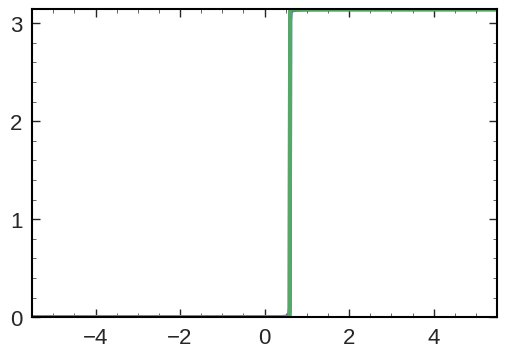

In [209]:
plt.plot(erange, [tm.delta(e, 1e-3, q.iImG, q.iReG) for e in erange])
plt.plot(erange, [tm.delta(e, 1e-3, qq.iImG, qq.iReG) for e in erange])

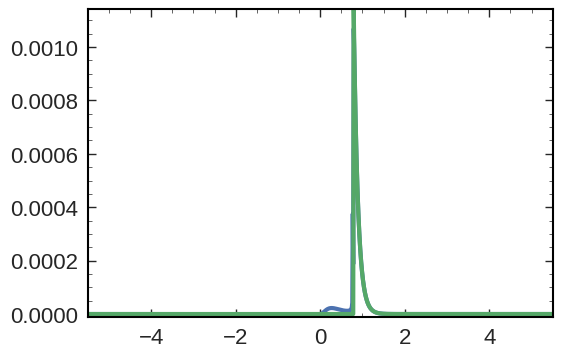

In [183]:
plt.plot(erange, [tm.delta(e, .5, q.iImG, q.iReG)*tm.n_f(e, 0.1) for e in erange])
plt.plot(erange, [tm.delta(e, .5, qq.iImG, qq.iReG)*tm.n_f(e, 0.1) for e in erange])

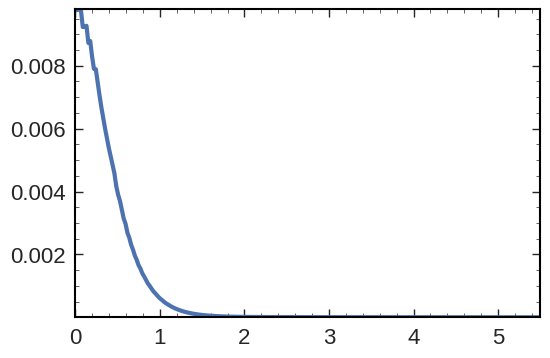

In [184]:
plt.plot(qrange, [tm.OmQ_F_om_int(z, 0.2, q.iImG, q.iReG) for z in qrange])

In [185]:
n_f(2, 1)

0.11920292202211755

In [186]:
1 - n_f(2, 1)

0.8807970779778824

In [187]:
n_f(-2, 1)

0.8807970779778823

Text(0, 0.5, '$P/T^4$')

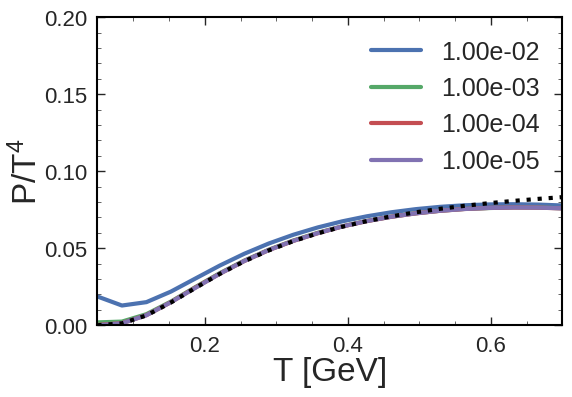

In [188]:
for eps, ps in zip(epss, pss):
    plt.plot(Trange, ps/Trange**4, label='%.2e'%eps)
plt.plot(Trange, Pfree / Trange**4, ls=':', c='black')
# plt.xlim(0.1, .7)

plt.ylim(0, 0.2)
plt.legend()

plt.xlabel('T [GeV]')
plt.ylabel(r'$P/T^4$')

# Boson QP pressure 

In [189]:
Pfree_B = array([quad(lambda z: -z*z*T*log(1 - exp(-sqrt(0.6**2 + z**2)/T)) / 2/pi**2, 0, np.inf)[0] for T in Trange])

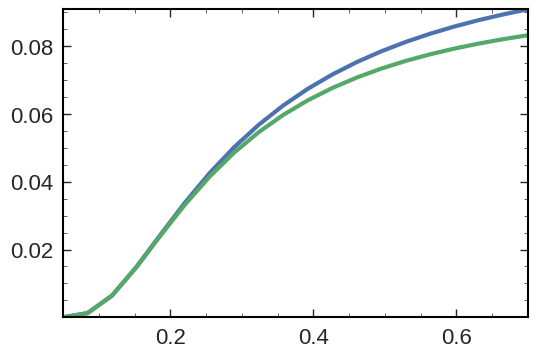

In [190]:
plt.plot(Trange, Pfree_B/Trange**4)
plt.plot(Trange, Pfree/Trange**4)

In [210]:
ps = array([tm.OmQ_B(T, qs[1].iImG, qs[1].iReG) for T in Trange])

(0.0, 0.2)

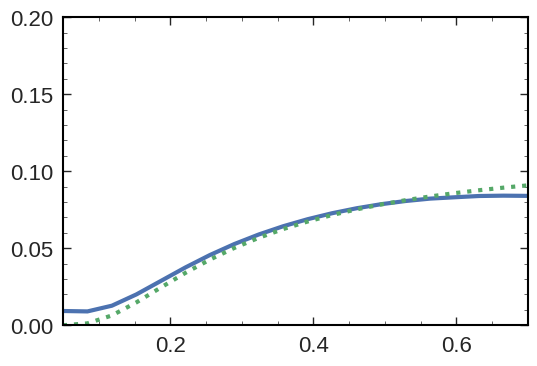

In [211]:
plt.plot(Trange, ps/Trange**4)
plt.plot(Trange, Pfree_B/Trange**4, ls=':')

plt.ylim(0, 0.2)
# plt.xlim(0.1, 0.7)